In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/drive/MyDrive/E_commerce_shipping_data.csv')

In [4]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


<ipython-input-6-c1bb2779d1cd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='viridis',annot=True)


<Axes: >

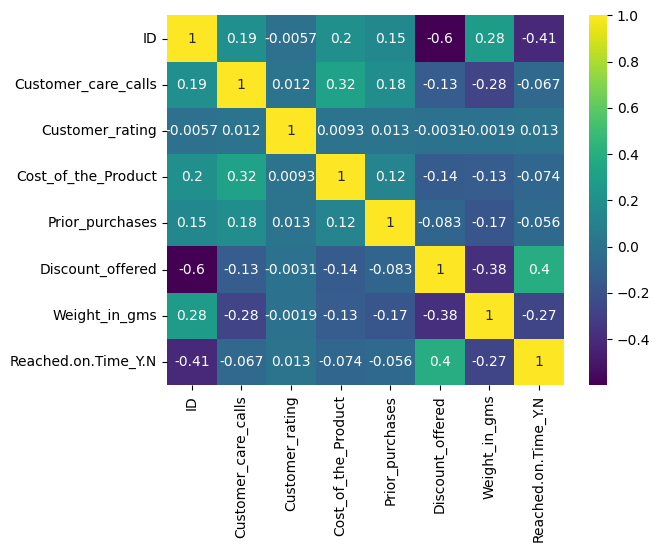

In [6]:

sns.heatmap(data.corr(), cmap='viridis',annot=True)


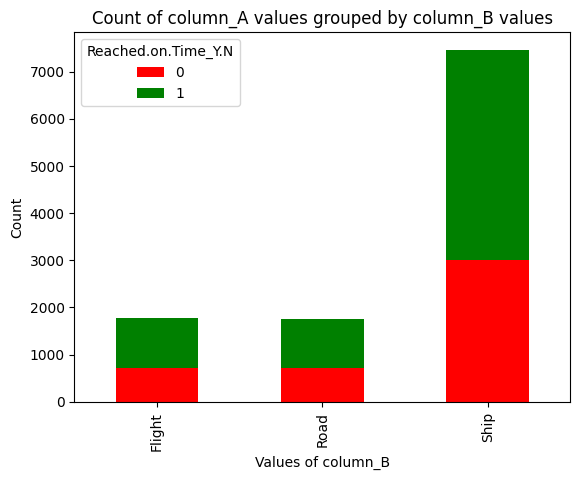

In [7]:
bar_colors = ['red', 'green']

grouped = data.groupby(['Mode_of_Shipment', 'Reached.on.Time_Y.N']).size().unstack()
grouped.plot(kind='bar', stacked=True, color=bar_colors)
plt.xlabel('Values of column_B')
plt.ylabel('Count')
plt.title('Count of column_A values grouped by column_B values')
plt.show()

In [8]:
# Since gender and ID are irrelevant columns, hence dropping them

data.drop(['ID','Gender'],axis=1,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Discount_offered     10999 non-null  int64 
 8   Weight_in_gms        10999 non-null  int64 
 9   Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 859.4+ KB


In [10]:
data['Mode_of_Shipment'].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

In [11]:
data['Product_importance'].value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

In [12]:
data['Warehouse_block'].value_counts()

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

## Dummy variable creation

In [15]:
data['Warehouse_block'] = data['Warehouse_block'].map({
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'F': 4
})

data['Mode_of_Shipment'] = data['Mode_of_Shipment'].map({
    'Flight': 0,
    'Ship': 1,
    'Road': 2
})


data['Product_importance'] = data['Product_importance'].map({
    'low': 0,
    'medium': 1,
    'high': 2
})

data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,0,44,1233,1
1,4,0,4,5,216,2,0,59,3088,1
2,0,0,2,2,183,4,0,48,3374,1
3,1,0,3,3,176,4,1,10,1177,1
4,2,0,2,2,184,3,1,46,2484,1


## XY Split

In [19]:
X = data.drop(['Reached.on.Time_Y.N'],axis=1)
type(X)

pandas.core.frame.DataFrame

In [20]:
X.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,3,0,4,2,177,3,0,44,1233
1,4,0,4,5,216,2,0,59,3088
2,0,0,2,2,183,4,0,48,3374
3,1,0,3,3,176,4,1,10,1177
4,2,0,2,2,184,3,1,46,2484


In [21]:
X.shape

(10999, 9)

In [22]:
y = data['Reached.on.Time_Y.N']
type(y)

pandas.core.series.Series

In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Reached.on.Time_Y.N, dtype: int64

In [24]:
y.shape

(10999,)

## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=16)

In [27]:
X_train.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
9328,2,0,4,5,233,6,1,1,5284
6829,4,2,5,4,267,5,0,9,1017
6224,0,1,4,2,217,6,1,3,1732
569,4,1,4,5,265,2,1,18,2969
2370,3,1,4,4,161,4,0,14,1194


In [28]:
X_train.shape

(8249, 9)

In [29]:
X_test.shape

(2750, 9)

## Training Classification Tree

In [50]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 4)

In [51]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

## Prediction using trained model

In [52]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [53]:
y_test_pred

array([1, 0, 1, ..., 0, 0, 0])

## Model Performance

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, f1_score

In [55]:
confusion_matrix(y_train, y_train_pred)

array([[3123,  191],
       [2439, 2496]])

In [85]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[1049   73]
 [ 775  853]]


Specificity (True Negative Rate):
Specificity measures the ability of the model to correctly identify the true negatives.
It's also known as the true negative rate.
Specificity is defined as: Specificity = True Negatives / (True Negatives + False Positives)
High specificity indicates that the model is good at correctly identifying negative instances while minimizing false positives.

Negative Predictive Value (NPV):
NPV measures the probability that a negative prediction from the model is correct.
It's the ratio of true negative predictions to all negative predictions made by the model.
NPV is defined as: NPV = True Negatives / (True Negatives + False Negatives)
High NPV indicates that when the model predicts a negative outcome, it is likely to be correct.

In [86]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

specificity_1 = TN / (TN + FP)
npv_1 = TN / (TN + FN)

print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)



True Negatives (TN): 1049
False Positives (FP): 73
False Negatives (FN): 775
True Positives (TP): 853
Specificity (True Negative Rate): 0.9349376114081996
NPV (Negative Predictive Value): 0.575109649122807


In [119]:
accuracy_1 = accuracy_score(y_test, y_test_pred)
print(f'Accuracy Score : {accuracy_1}')

precision_1 = precision_score(y_test, y_test_pred)
print(f'Precision Score : {precision_1}')

recall_1 = recall_score(y_test, y_test_pred)
print(f'Recall Score : {recall_1}')

f1_1 = f1_score(y_test, y_test_pred)
print(f'F1 Score : {f1_1}')

print("Specificity (True Negative Rate):", specificity_1)
print("NPV (Negative Predictive Value):", npv_1)

Accuracy Score : 0.6916363636363636
Precision Score : 0.9211663066954644
Recall Score : 0.523955773955774
F1 Score : 0.6679718089271731
Specificity (True Negative Rate): 0.9349376114081996
NPV (Negative Predictive Value): 0.575109649122807


## Ploting Decision Tree

In [58]:
# pip install pydotplus

In [59]:
dot_data = tree.export_graphviz(clftree, out_file=None, feature_names= X_train.columns, filled= True)

In [60]:
from IPython.display import Image

In [61]:
import pydotplus

In [62]:
# !pip install graphviz



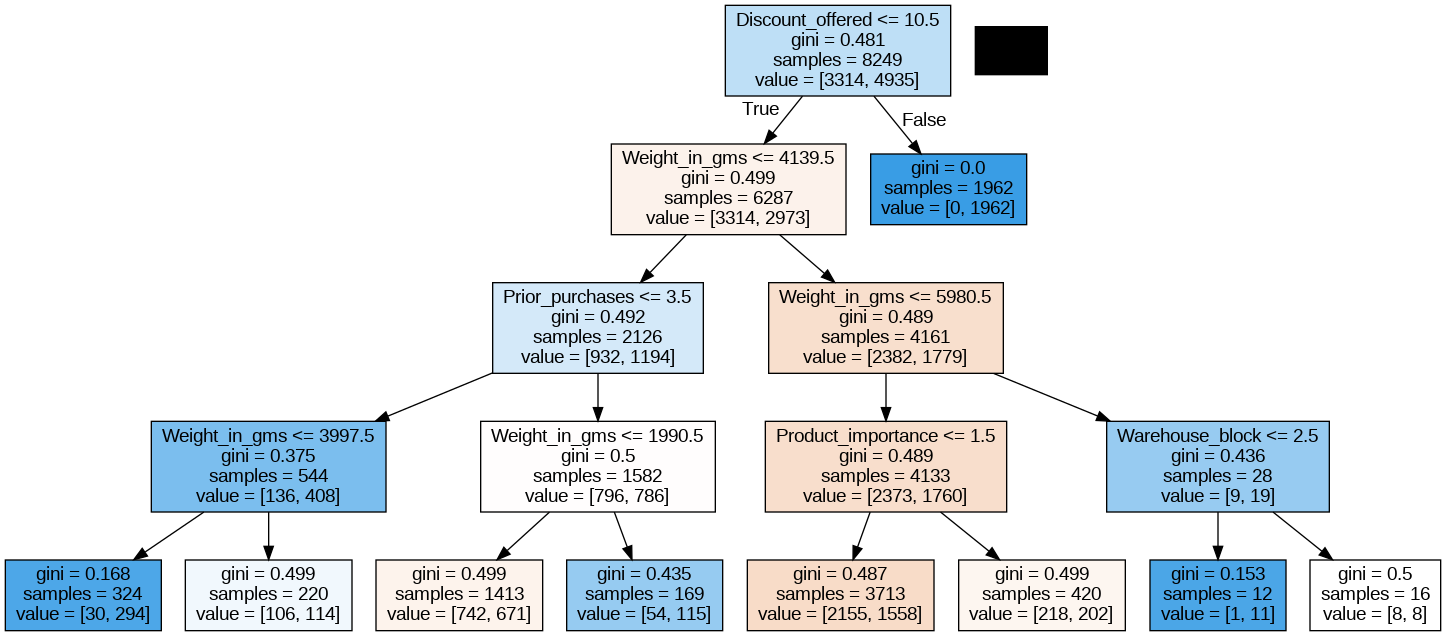

In [63]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Controlling Tree Growth

In [111]:
clftree_2 = tree.DecisionTreeClassifier(min_samples_leaf=1000, max_depth=3)
clftree_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=1000)

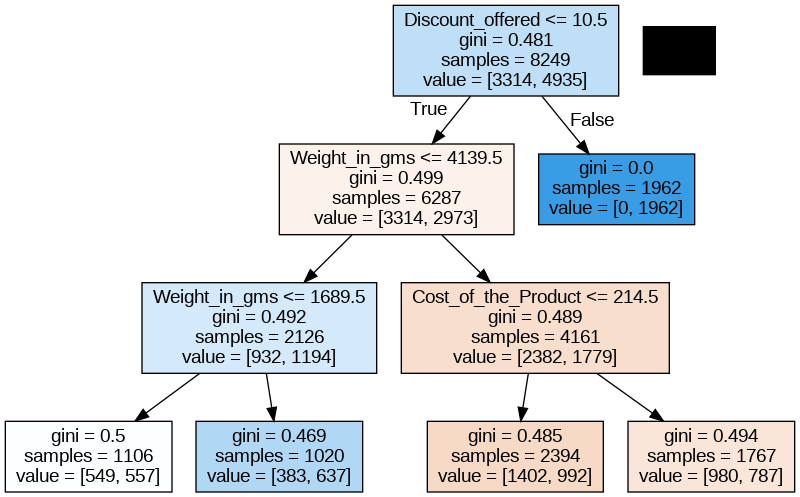

In [112]:

dot_data = tree.export_graphviz(clftree_2, out_file=None, feature_names= X_train.columns, filled= True)
graph_2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph_2.create_png())

In [113]:
y_test_pred_2 = clftree_2.predict(X_test)

In [114]:
cm_2 = confusion_matrix(y_test, y_test_pred_2)
print(cm_2)

[[ 797  325]
 [ 571 1057]]


In [115]:
TN = cm_2[0, 0]
FP = cm_2[0, 1]
FN = cm_2[1, 0]
TP = cm_2[1, 1]

specificity_2 = TN / (TN + FP)
npv_2 = TN / (TN + FN)

print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)



True Negatives (TN): 797
False Positives (FP): 325
False Negatives (FN): 571
True Positives (TP): 1057
Specificity (True Negative Rate): 0.7103386809269162
NPV (Negative Predictive Value): 0.5826023391812866


In [118]:
accuracy_2 = accuracy_score(y_test, y_test_pred_2)
print(f'Accuracy Score : {accuracy_2}')

precision_2 = precision_score(y_test, y_test_pred_2)
print(f'Precision Score : {precision_2}')

recall_2 = recall_score(y_test, y_test_pred_2)
print(f'Recall Score : {recall_2}')

f1_2 = f1_score(y_test, y_test_pred_2)
print(f'F1 Score : {f1_2}')

print("Specificity (True Negative Rate):", specificity_2)
print("NPV (Negative Predictive Value):", npv_2)

Accuracy Score : 0.6741818181818182
Precision Score : 0.7648335745296672
Recall Score : 0.6492628992628993
F1 Score : 0.702325581395349
Specificity (True Negative Rate): 0.7103386809269162
NPV (Negative Predictive Value): 0.5826023391812866


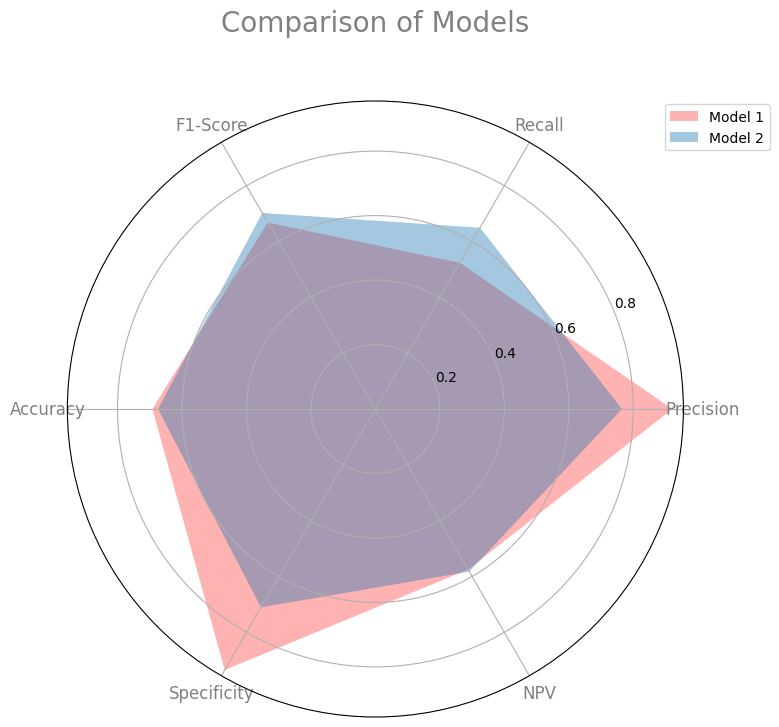

In [117]:

categories = ["Precision", "Recall", "F1-Score", "Accuracy","Specificity","NPV"]

N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

model1_values = [precision_1, recall_1, f1_1, accuracy_1,specificity_1,npv_1]

model2_values = [precision_2, recall_2, f1_2, accuracy_2,specificity_2,npv_2]

fig, ax = plt.subplots(subplot_kw={'polar': True}, figsize=(8, 8))

ax.fill(angles, model1_values + model1_values[:1], 'r', alpha=0.3)

ax.fill(angles, model2_values + model2_values[:1], 'p', alpha=0.4)

plt.title("Comparison of Models", size=20, color='gray', y=1.1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=12, color='gray')

plt.legend(['Model 1', 'Model 2'], loc=(0.97, 0.92))

plt.show()
